In [1]:
## https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

## https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

It’s normal to hand-define kernels to obtain various image processing functions. In fact, you might already be
familiar with blurring (average smoothing, Gaussian smoothing, median smoothing, etc.),
edge detection (Laplacian, Sobel, Scharr, Prewitt, etc.), and sharpening — all of these operations are forms
of hand-defined kernels that are specifically designed to perform a particular function.

In [1]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

## Define our custom Convolve method :

In [4]:
def convolve(image, kernel):
    # PART - I :
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    # padding such that the output image will match the dimensions of the input image
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    #  Here we are simply replicating the pixels along the border of the image
    output = np.zeros((iH, iW), dtype="float32")
    
    # Other padding methods exist, including zero padding (filling the borders with zeros — very common when
    # building Convolutional Neural Networks) and wrap around (where the border pixels are determined by examining
    # the opposite end of the image). In most cases, you’ll see either replicate or zero padding.
    
    # PART - II :
    # loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to
    # bottom, 1 pixel at a time :
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
        
            # extract the ROI (Region of Interest) of the image by extracting the *center* region of the current
            # (x, y)-coordinates dimensions:
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
        
            # perform the actual convolution by taking the element-wise multiplicate between the ROI and 
            # the kernel, then summing the matrix :
            k = (roi * kernel).sum()
        
            # store the convolved value in the output (x,y)- coordinate of the output image
            output[y - pad, x - pad] = k
    
    # PART - III :
    # rescale the output image to be in the range [0, 255]:
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image:
    return output

## Note : When working with images, we typically deal with pixel values falling in the range [0, 255]. However,
## when applying convolutions, we can easily obtain values that fall outside this range.

## In order to bring our output  image back into the range [0, 255], we apply the rescale_intensity  function
## of scikit-image. We also convert our image back to an unsigned 8-bit integer data type in the next line
## (previously, the output  image was a floating point type in order to handle pixel values outside the
## range [0, 255]).


Let's now define a series of kernels we are going to apply to our image :

In [15]:

# construct average blurring kernels used to smooth an image :
# Following lines define a 7 x 7 kernel and a 21 x 21 kernel used to blur/smooth an image. The larger the kernel
# is, the more the image will be blurred. Examining this kernel, you can see that the output of applying the
# kernel to an ROI will simply be the average of the input region :
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter :
# In the following line we define a sharpening kernel, used to enhance line structures and other details of an
# image. Explaining each of these kernels in detail is outside the scope of this tutorial, so if you’re interested
# in learning more about kernel construction, I would suggest starting here and then playing around with the
# excellent kernel visualization tool on Setosa.io.:
sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")

# Let's define a few more kernels :

# construct the Laplacian kernel used to detect edge-like regions of an image :
# Laplacian operator can be used as a form of edge detection.The Laplacian is also very useful
# for detecting blur in images.
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel:
# The following Sobel filter is used to detect vertical changes in the gradient of the image.
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel:
# This Sobel filter is used to detect horizontal changes in the gradient.
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")

# We have defined 6 nos. kernels

In [4]:
from PIL import Image
import pytesseract

(3504, 2528)
width=2528, height=3504


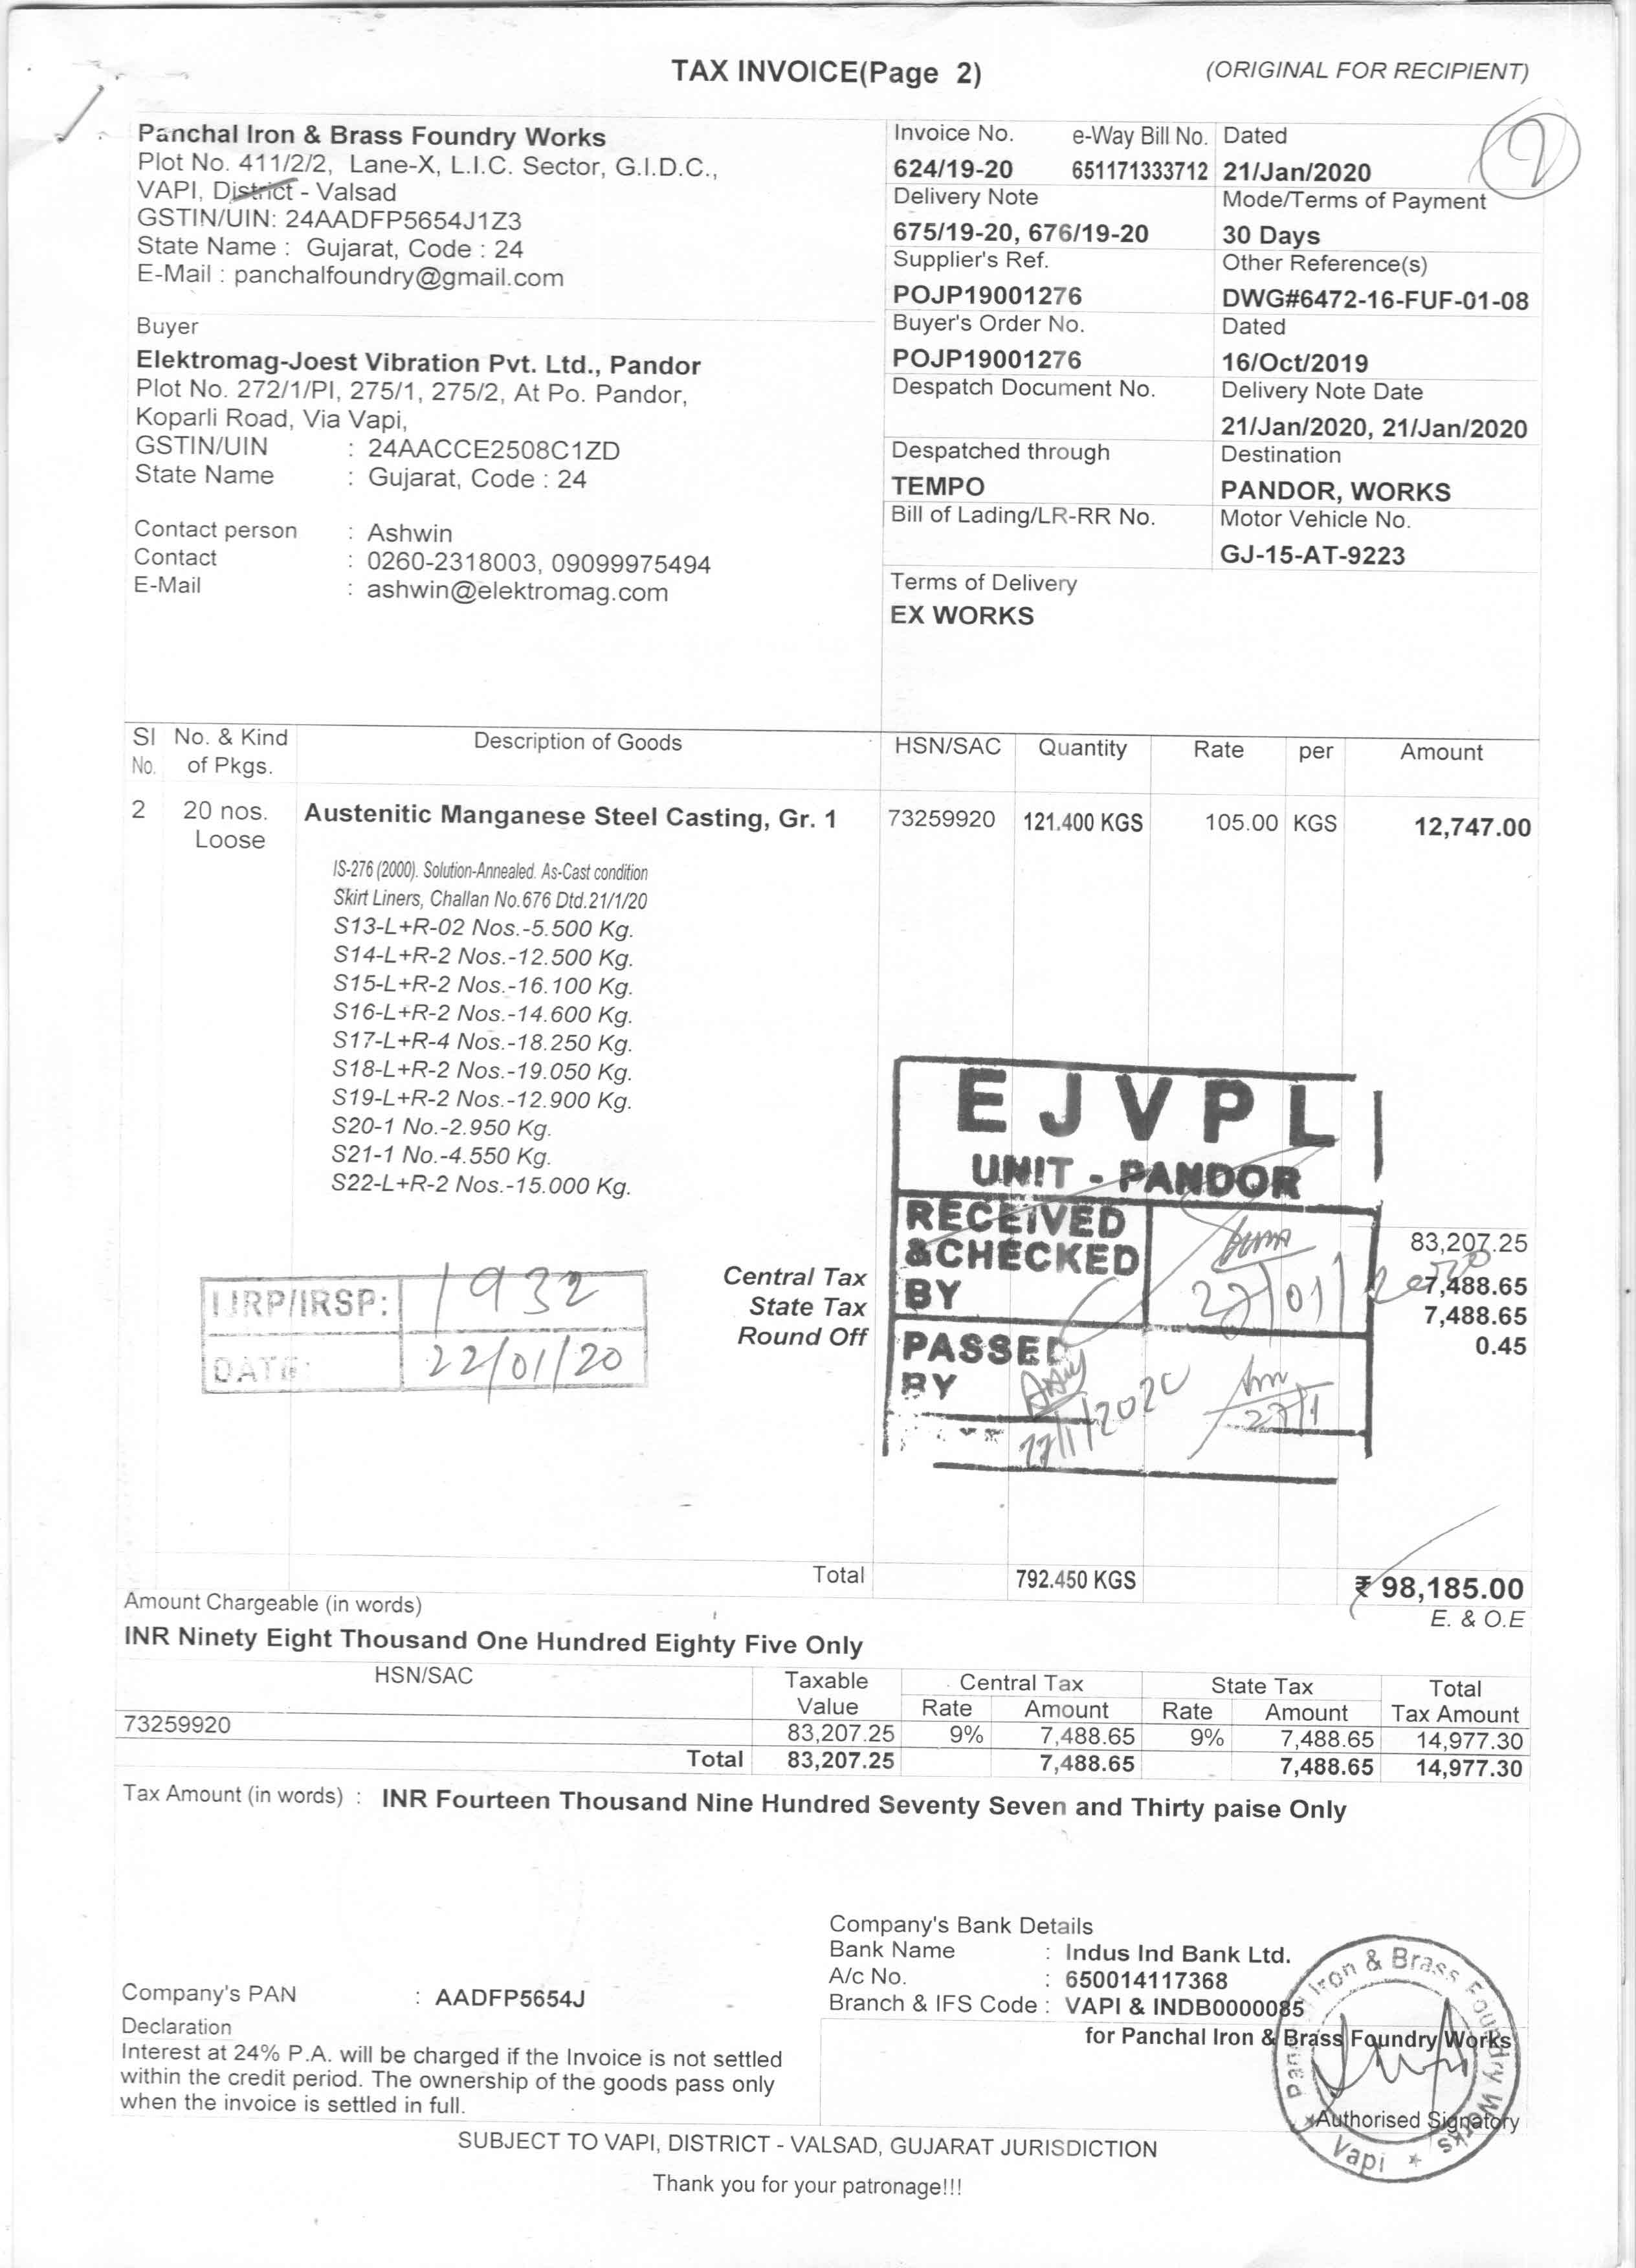

In [17]:
# Loimading image and see the dimensions for resizing :
image_1 = cv2.imread("INVOICE2.jpg", 0) ## Loading image directly as black & white.
print(image_1.shape)
(h, w) = image_1.shape # h = no. of rows, w = no. of columns
print("width={}, height={}".format(w, h))

# Display in original size :
image_pil_1 = Image.fromarray(image_1) 
display(image_pil_1) 

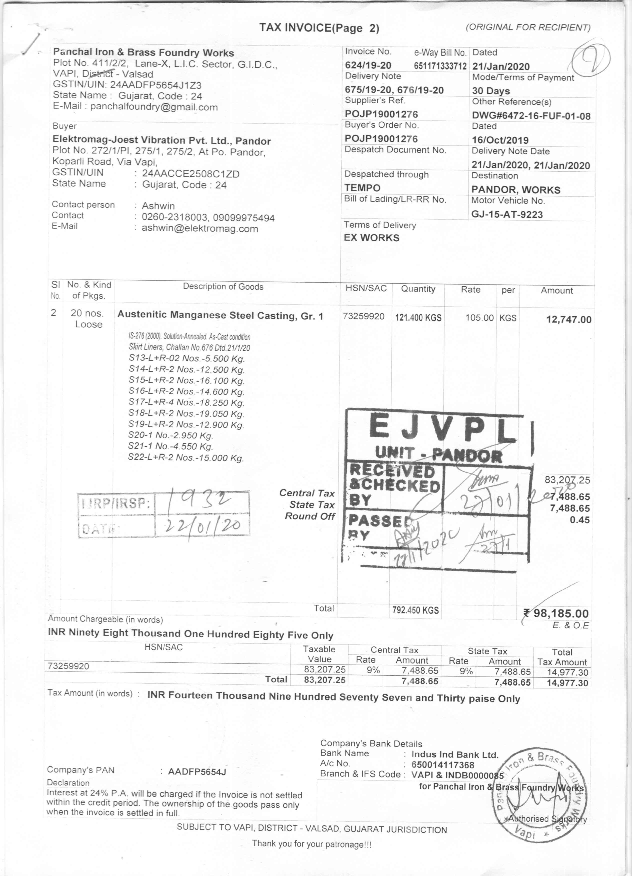

In [18]:
# Resize to 25% and display :
dim = (int(w * 0.25), int(h * 0.25))
image_1_resized = cv2.resize(image_1, dim)
image_pil_1_resized = Image.fromarray(image_1_resized) 
display(image_pil_1_resized) 

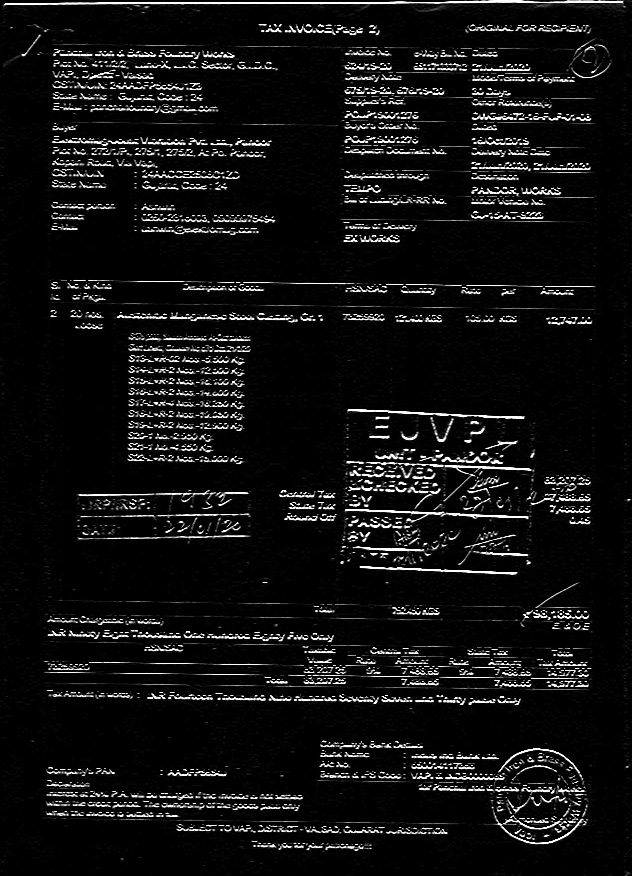

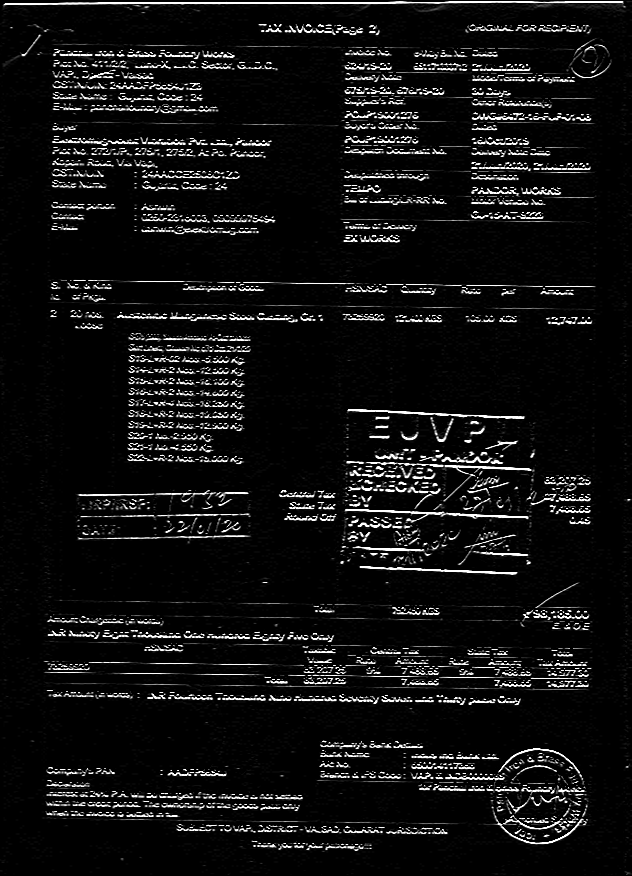

In [27]:
convoleOutput = convolve(image_1_resized, sobelY)
opencvOutput = cv2.filter2D(image_1_resized, -1, sobelY)
convoleOutput_pil = Image.fromarray(convoleOutput) 
display(convoleOutput_pil)
opencvOutput_pil = Image.fromarray(opencvOutput)
display(opencvOutput_pil)

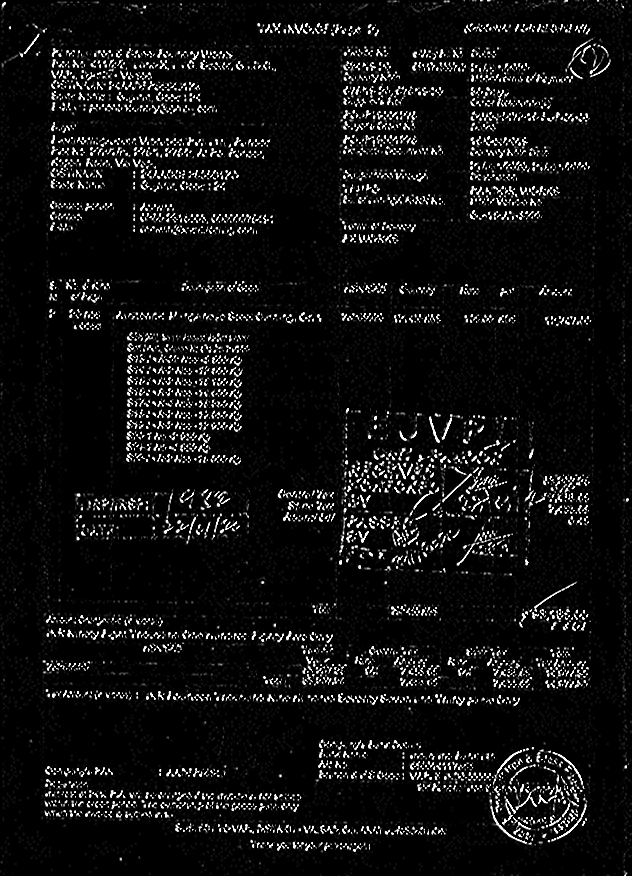

In [28]:
convole_sobel = convolve(convoleOutput, sobelX)

convole_sobel_pil = Image.fromarray(convole_sobel) 
display(convole_sobel_pil)


In [30]:
from pytesseract import image_to_string

text_1 = pytesseract.image_to_string(image_pil_1)

print(text_1)


TAX INVOICE(Page 2)

/ Panchal lron & Brass Foundry Works
Plot No. 411/2/2, Lane- X L. I C. Sector G. I D. C
VAPI DM- Valsad
GSTIN/UIN124AADFP5654J123
State Name : Gujarat, Code : 24
E—Mail : panchalfoundry@gmail.com

Buyer

Elektromag-Joest Vibration Pvt. Ltd., Pandor
Plot No. 272/1/Pl, 275/1, 275/2, At P0. Pandor,
Koparli Road, Via Vapi,

GSTlN/UIN : 24AACCE250801ZD

State Name : Gujarat, Code : 24

 

(ORIGINAL FOR RECIPIENT)

  

Invoice No. away Bin No Dated
624/19-20 651171333712 21IJanI2020
' DeliVery Note ModeITerms of Payment

675/19- 20, 676/19-20
Supplier's Ref.

30 Days 7
Other Reference(s)

POJP19001276 DWG#6472-16-FUF-01-08
Buyer's Order No. Dated
POJP1 9001 276 7 1 6/Octl201 9

Despatch Document No. Delivery Note Date,

721lJanI2020L21IJiagl2220
Destination

_PANDOR, WORKS 7
Motor Vehicle No.

’Despatched Enough

TEMPO, ,- 2.--,
IBilI of Lading/LR—RR No.

 

Contact person : Ashwin J- -A -9223
Contact : 0260-2318003, 09099975494 , G 15 T
E-Mail : ashwin@elektromag.com Te

In [34]:
convoleOutput = convolve(image_1, sobelX)

convoleOutput_pil = Image.fromarray(convoleOutput) 

text_2 = pytesseract.image_to_string(convoleOutput_pil)

print(text_2)

I'.‘\X li\|\/O|CI5(I’:.IIJJI) 9.)

. I » I. \
Pancho! Iron :3 m 133: oIInIzlry Works "“"""‘ No.
Plot No. 41 ‘I/2/‘2. II :Ino-X I. ..I.(3 “ 5ootoI, (‘5..I I).3.( I'52II/l‘) 2|)
wun oinmf vdu ul IhmvnyNom
3f':3III\I/UII\I 24/,\’\I)I' I>I5I5£.5IIJI/.:3 Inns/19.20, 5/3/1920
55::th , N .Imo : ()1.Ij:.II‘:.I'L',(3I)I:lo . 2.4

. _ SIIpplior's Rof.
I-Z-IVIIJII : p:;Inoh:.Il'IouIIIiII'I/(I:Qgniz.Iil.I)onI

.IM)591900I2/5
”HI/(5,. ‘ Isuyor's Orclor No.
' .IM)JPI90012/s

:IIII)I<I.I'om:.II: -.Joo:‘I Vibration "III. Ltcl. "unclor .
‘J ) ' ’ I I Dospoich DooiinIont No.
l

Plot No. 2/2/‘l/I’I, 2/55/1, 2/55/2, AI I’o. Ponclor,
Koparli Road, Viz) Vopi.

(3S I'lN/UIN ’2.IIA/\(3(3I {25502301 /.I)
State Namo I Gujarat. COIiII) I 7.4

I)o:s;o:.ItI:iII)I:I through

I‘IIIIIIIIJI)
Bill of |.:.II:IiIII:J/| .II-HR No.

Contact person : Ashwin

Cmtmt : (’2I‘ .'21"((: (9 SH 5" S. ‘ . . .

If .( . )’,)0. ' 35‘) ) 3 3' )20 _) ) )K‘) ”4 |<)I'I‘IIS 0i |)O|I\/I)I\/
Iz-Mail . LISIIWII)(I.DI)|I)I<(I OIIIIJIICOIII

IiX

In [36]:
blurred = cv2.GaussianBlur(image_1, (11, 11), 0)
blurred_pil = Image.fromarray(blurred)
text_3 = pytesseract.image_to_string(blurred_pil)
print(text_3)

TAX lNVO|cE(P.g. 2) (ORIGINAL FOR RECIPIENT)

/ Panchal Iron 0 Brass Foundry Works '"V°‘°° N°~ e-Way Bil N0 0.100 @

Plot No 411/2/2. Lane-X. L.I.C. Sector. G.I.D.C., 024l19-20 051171333712 21IJanI2020
VAPI DM- Valsad Delivery Note Mode/Terms 01 Payment
GSTlN/UIN 24AADFP5654J123 375119-20. 373119-20 3o DOY'
State Name . Gujarat. Code : 24 Supplier‘s Rel. Other Reference“)
E'Ma" ”anmamum'ymma" °°"‘ P0JPtsoo127s owcmn-ts-FUF-m-oe
Buyer Buyer's Order No. Dated
POJP10001275 “mot/2019
Elelttromag-Joest Vibration Pvt. Ltd.. Pandor
Plot No 272mm. 275/1. 275/2. At P0. Pandor. W“ °°°‘"“°"' "°' Wm N” 0'“
Koparli Road, Via Vapi. 21lJ0nI2020. 21lJ0n/2020
GSTlN/UIN ‘ 24AACCE2508C1ZD DOWN through Dost-Much
State Name : Gujarat. Code . 24 TEMPO PANDOR, WORKS
Bill 01 LadinglLR-RR No. Motor Vehicle No
Contact person Ashwin - -
Contact 0260-2318003. 09099975494 Tm. of own” OJ 1MT 9223
E-M I h ' l kt .
a: as wm@e e romag com EX WORKS
SI No 0 Kind 0620900531 Goods HSNISAC Quantity Rate per Amount I
‘I: 0'

In [ ]:
########

Drawing on an image

Before we move on with drawing on an image with OpenCV, take note that drawing operations on images are performed in-place. Therefore at the beginning of each code block, we make a copy of the original image storing the copy as output . We then proceed to draw on the image called output in-place so we do not destroy our original image.



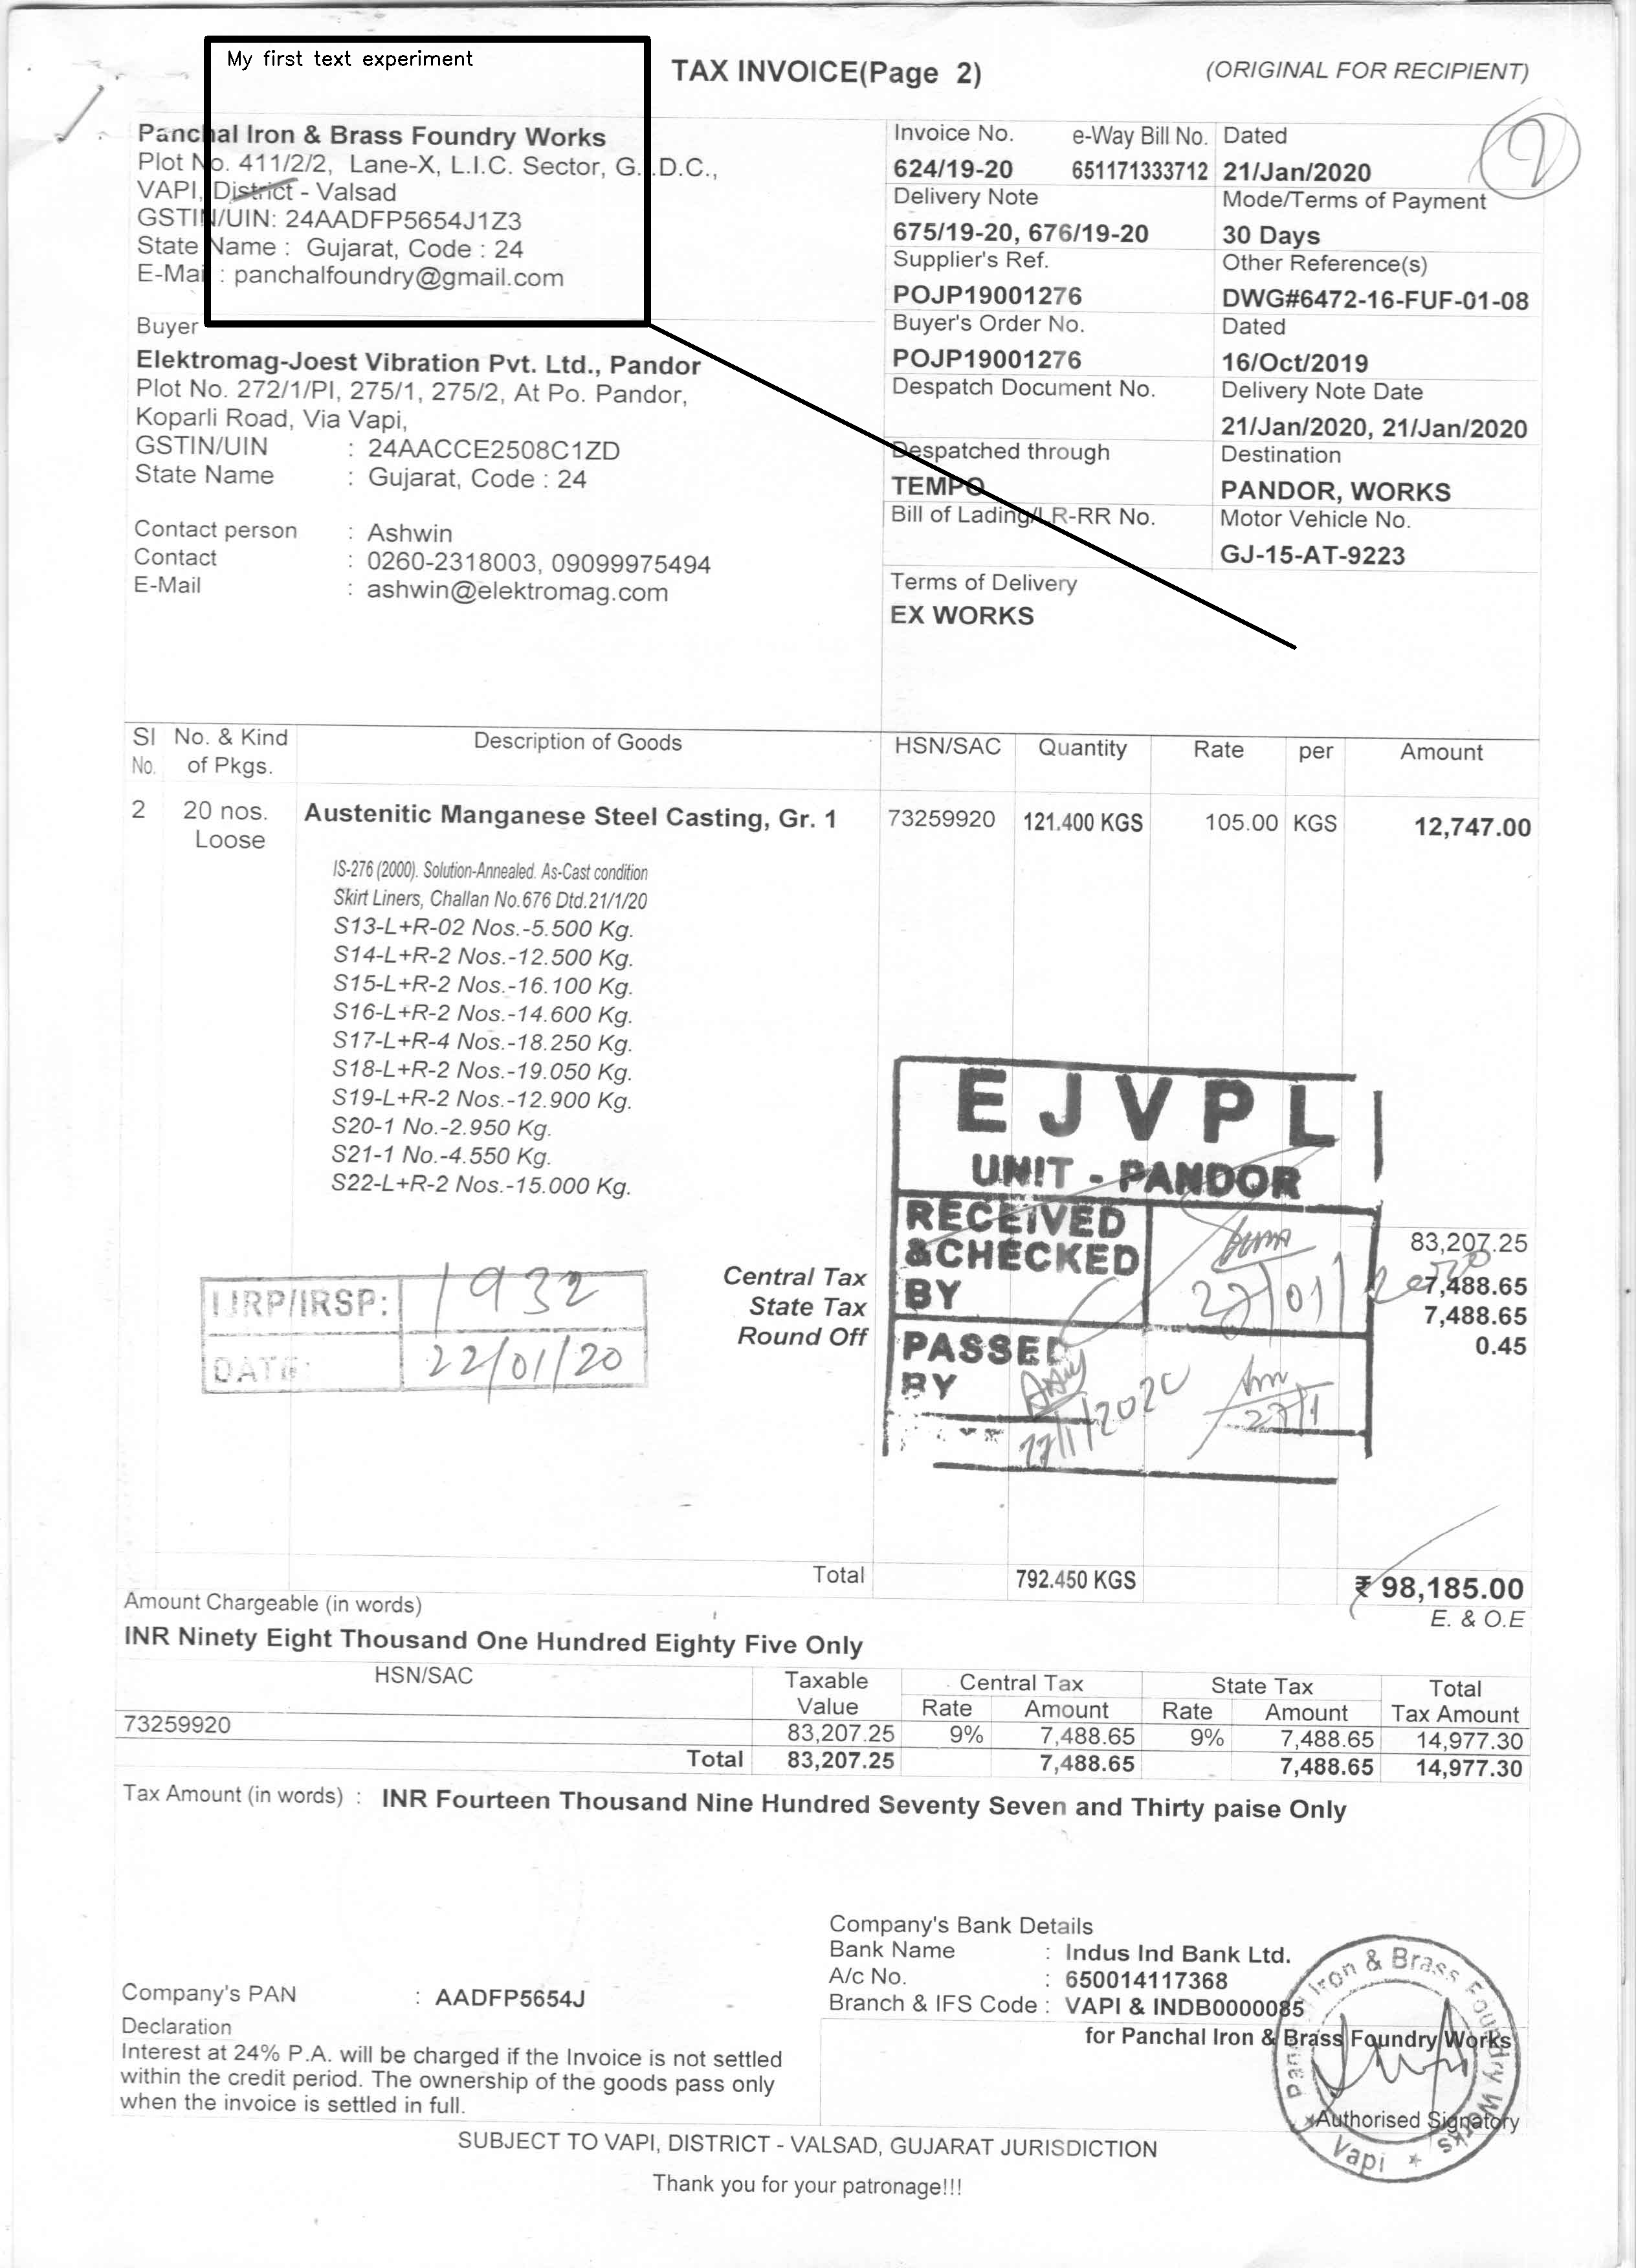

In [51]:
# draw a 10px thick rectangle and a 5px line
output_1 = image_1.copy()

# Rect co-ordinates = (320,60) and (1000,500); Next after comma is for color of line, next after comma is thickness
# of line (negative value makes solid rectangle). (img, pt1, pt, color, thickness):
# (0,0,255) is for red color lines (BGR)
# cv2.rectangle(output_1, (320, 60), (1000, 500), (0, 0, 255), 10)
cv2.rectangle(output_1, (320, 60), (1000, 500), 0, 10)


cv2.line(output_1, (1000,500), (2000, 1000), 0, 5
         
# for writting text : (image, text, start pt.,font, scale(font size multiplier), color, thickness)
# cv2.putText(output_1, "My first text experiment", (400,70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(output_1, "My first text experiment", (350,100), cv2.FONT_HERSHEY_SIMPLEX, 1, 0, 2)
output_1_pil = Image.fromarray(output_1)
display(output_1_pil)

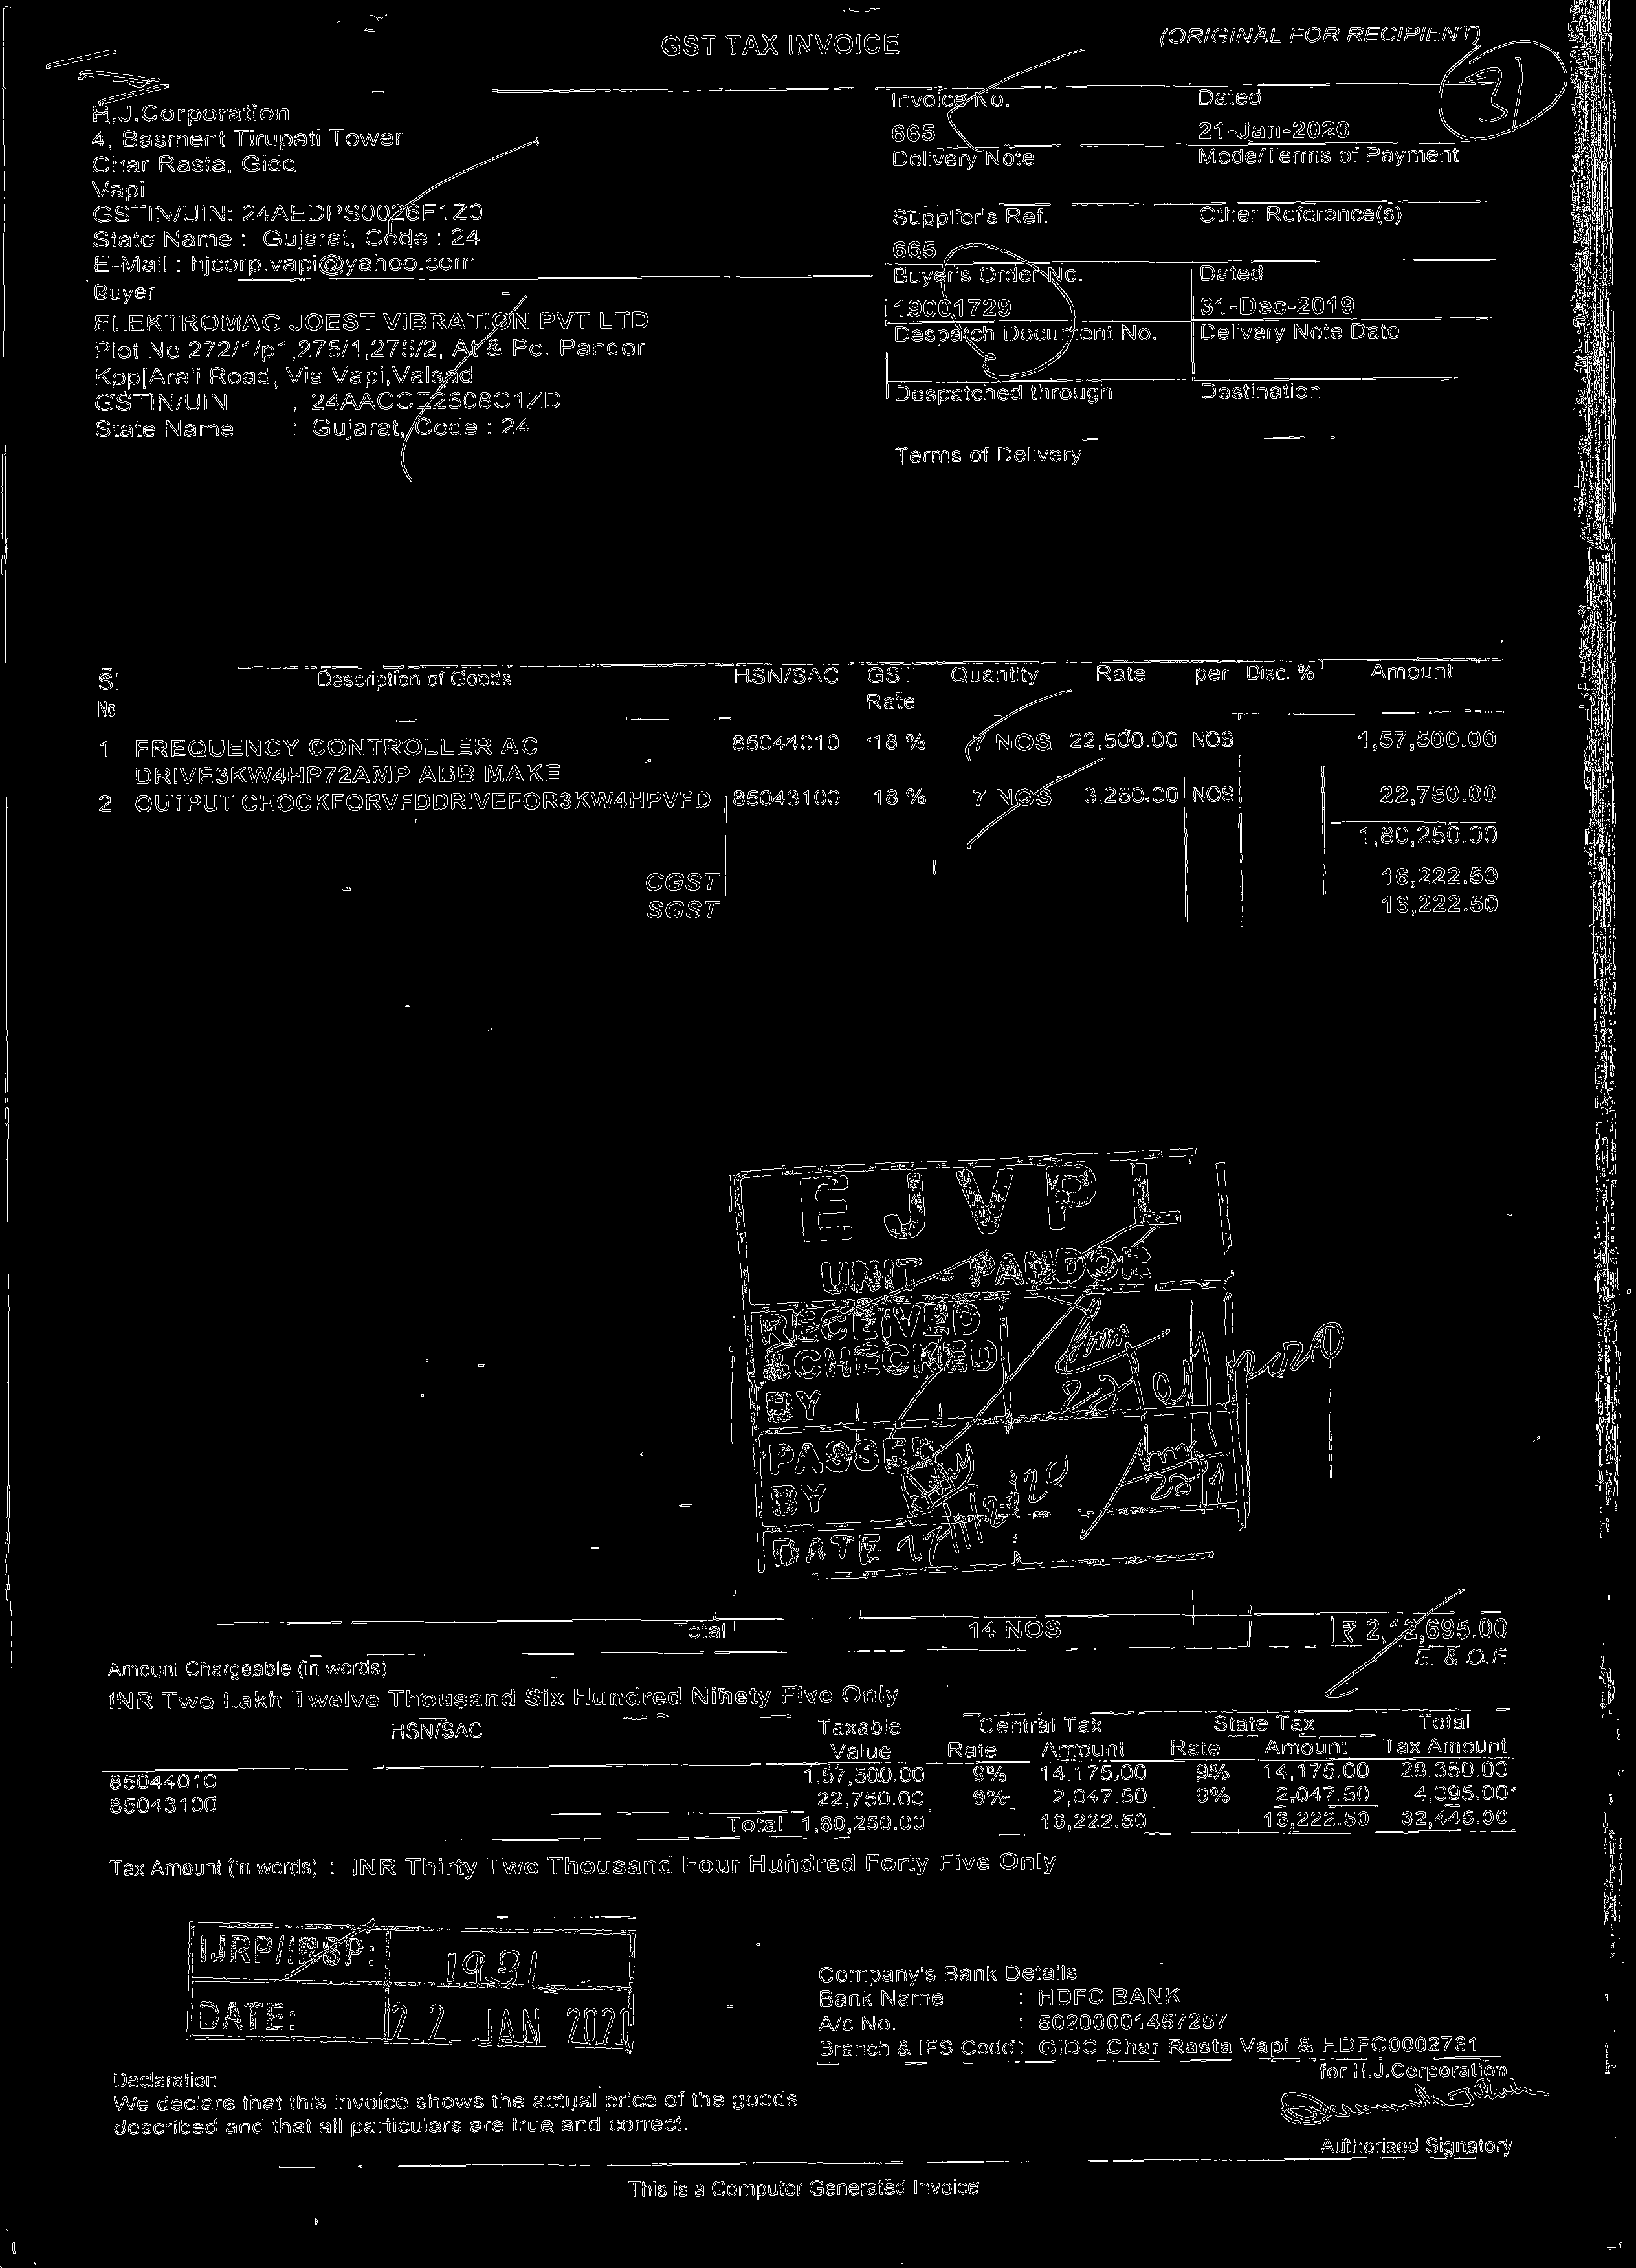

In [7]:
# applying edge detection we can find the outlines of objects in
# images

# We provide three parameters to the cv2.Canny  function:

# 1. img : The gray  image.
# 2. minVal : A minimum threshold, in our case 30 .
# 3. maxVal : The maximum threshold which is 150  in our example.
# 4. aperture_size : The Sobel kernel size. By default this value is 3  and hence is not shown here.
image_1 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white.
edged_1 = cv2.Canny(image_1, 30, 150)

edged_1_pil = Image.fromarray(edged_1)
display(edged_1_pil)

In [54]:
text_4 = pytesseract.image_to_string(edged_1_pil)
print(text_4)

TAX HNV©H@E(P@@@ 2) (©R7GHNAL FOR RECIPE/MU

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

  

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

j: Pa 8888M Hr©n 8 388188 F©Hmn8Hny W©HFHK<8 )ﬁnmﬂc‘a NQ" @‘Way BHHH N8 Daigd
PH©E N8. 4117272 Lan8= X. L.H H.©. 88mm. G.H.D.©.. 828M888 85HH7H8887H2 28788n7282®

VARH .DWH%= VaH 888 D8HHV8ry N©ﬁ® M8887T8nn8 @HH Paym8nH
GST HN/UH N: 28AADPP58548148 (gygmgggg @767ﬂ@22@ 3g @gyg H
SEQH’QBNQH’WE Gujarat. C©d8 . 24 SUppHH8T“S R8f. ©HHH8H’ R8H’8r8n88(8)
Emma?” : panChQHHQUW@W@gmaHH©©m R©JP88©©€HZ§78 - DW@#8472uﬁH8=PUF=-@ﬂm©l
Buy®f = IUV8T"S ©Td®T N8. @888
EH8kﬁr©magaJ®88ﬁ VH8888H©n Pvt. Liid... Ran8

In [75]:
x = np.uint8([250])
y = np.uint8([10])

print(x)

print(cv2.add(x,y)) # 250+10 = 260 => 255


print(x+y)        # 250+10 = 260 % 256 = 4


[250]
[[255]]
[4]


In [82]:
img_cv = cv2.imread('OpenCV-01.jpg')

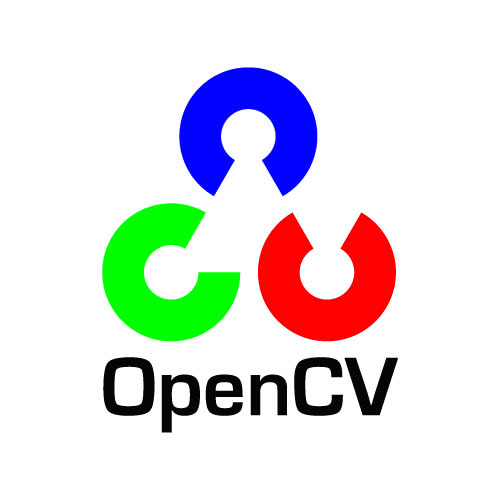

In [83]:
img_cv_pil = Image.fromarray(img_cv)
display(img_cv_pil)

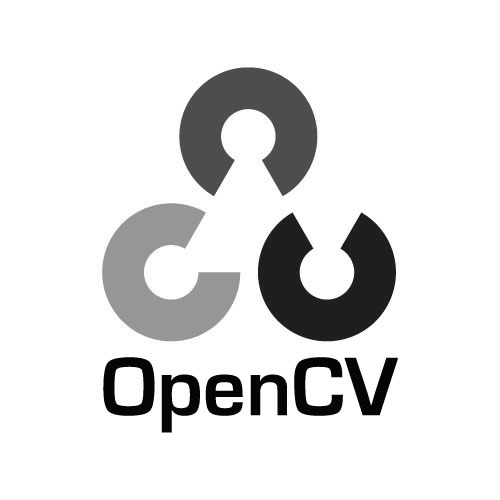

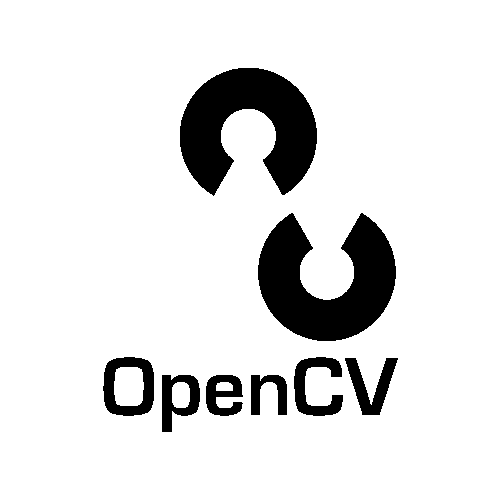

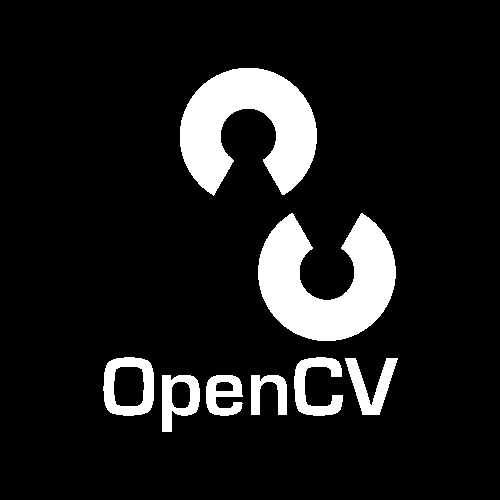

In [103]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img_cv,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img2gray_pil = Image.fromarray(img2gray)
display(img2gray_pil)

print('============================================')

mask_pil = Image.fromarray(mask)
display(mask_pil)

print('============================================')

mask_inv_pil = Image.fromarray(mask_inv)
display(mask_inv_pil)

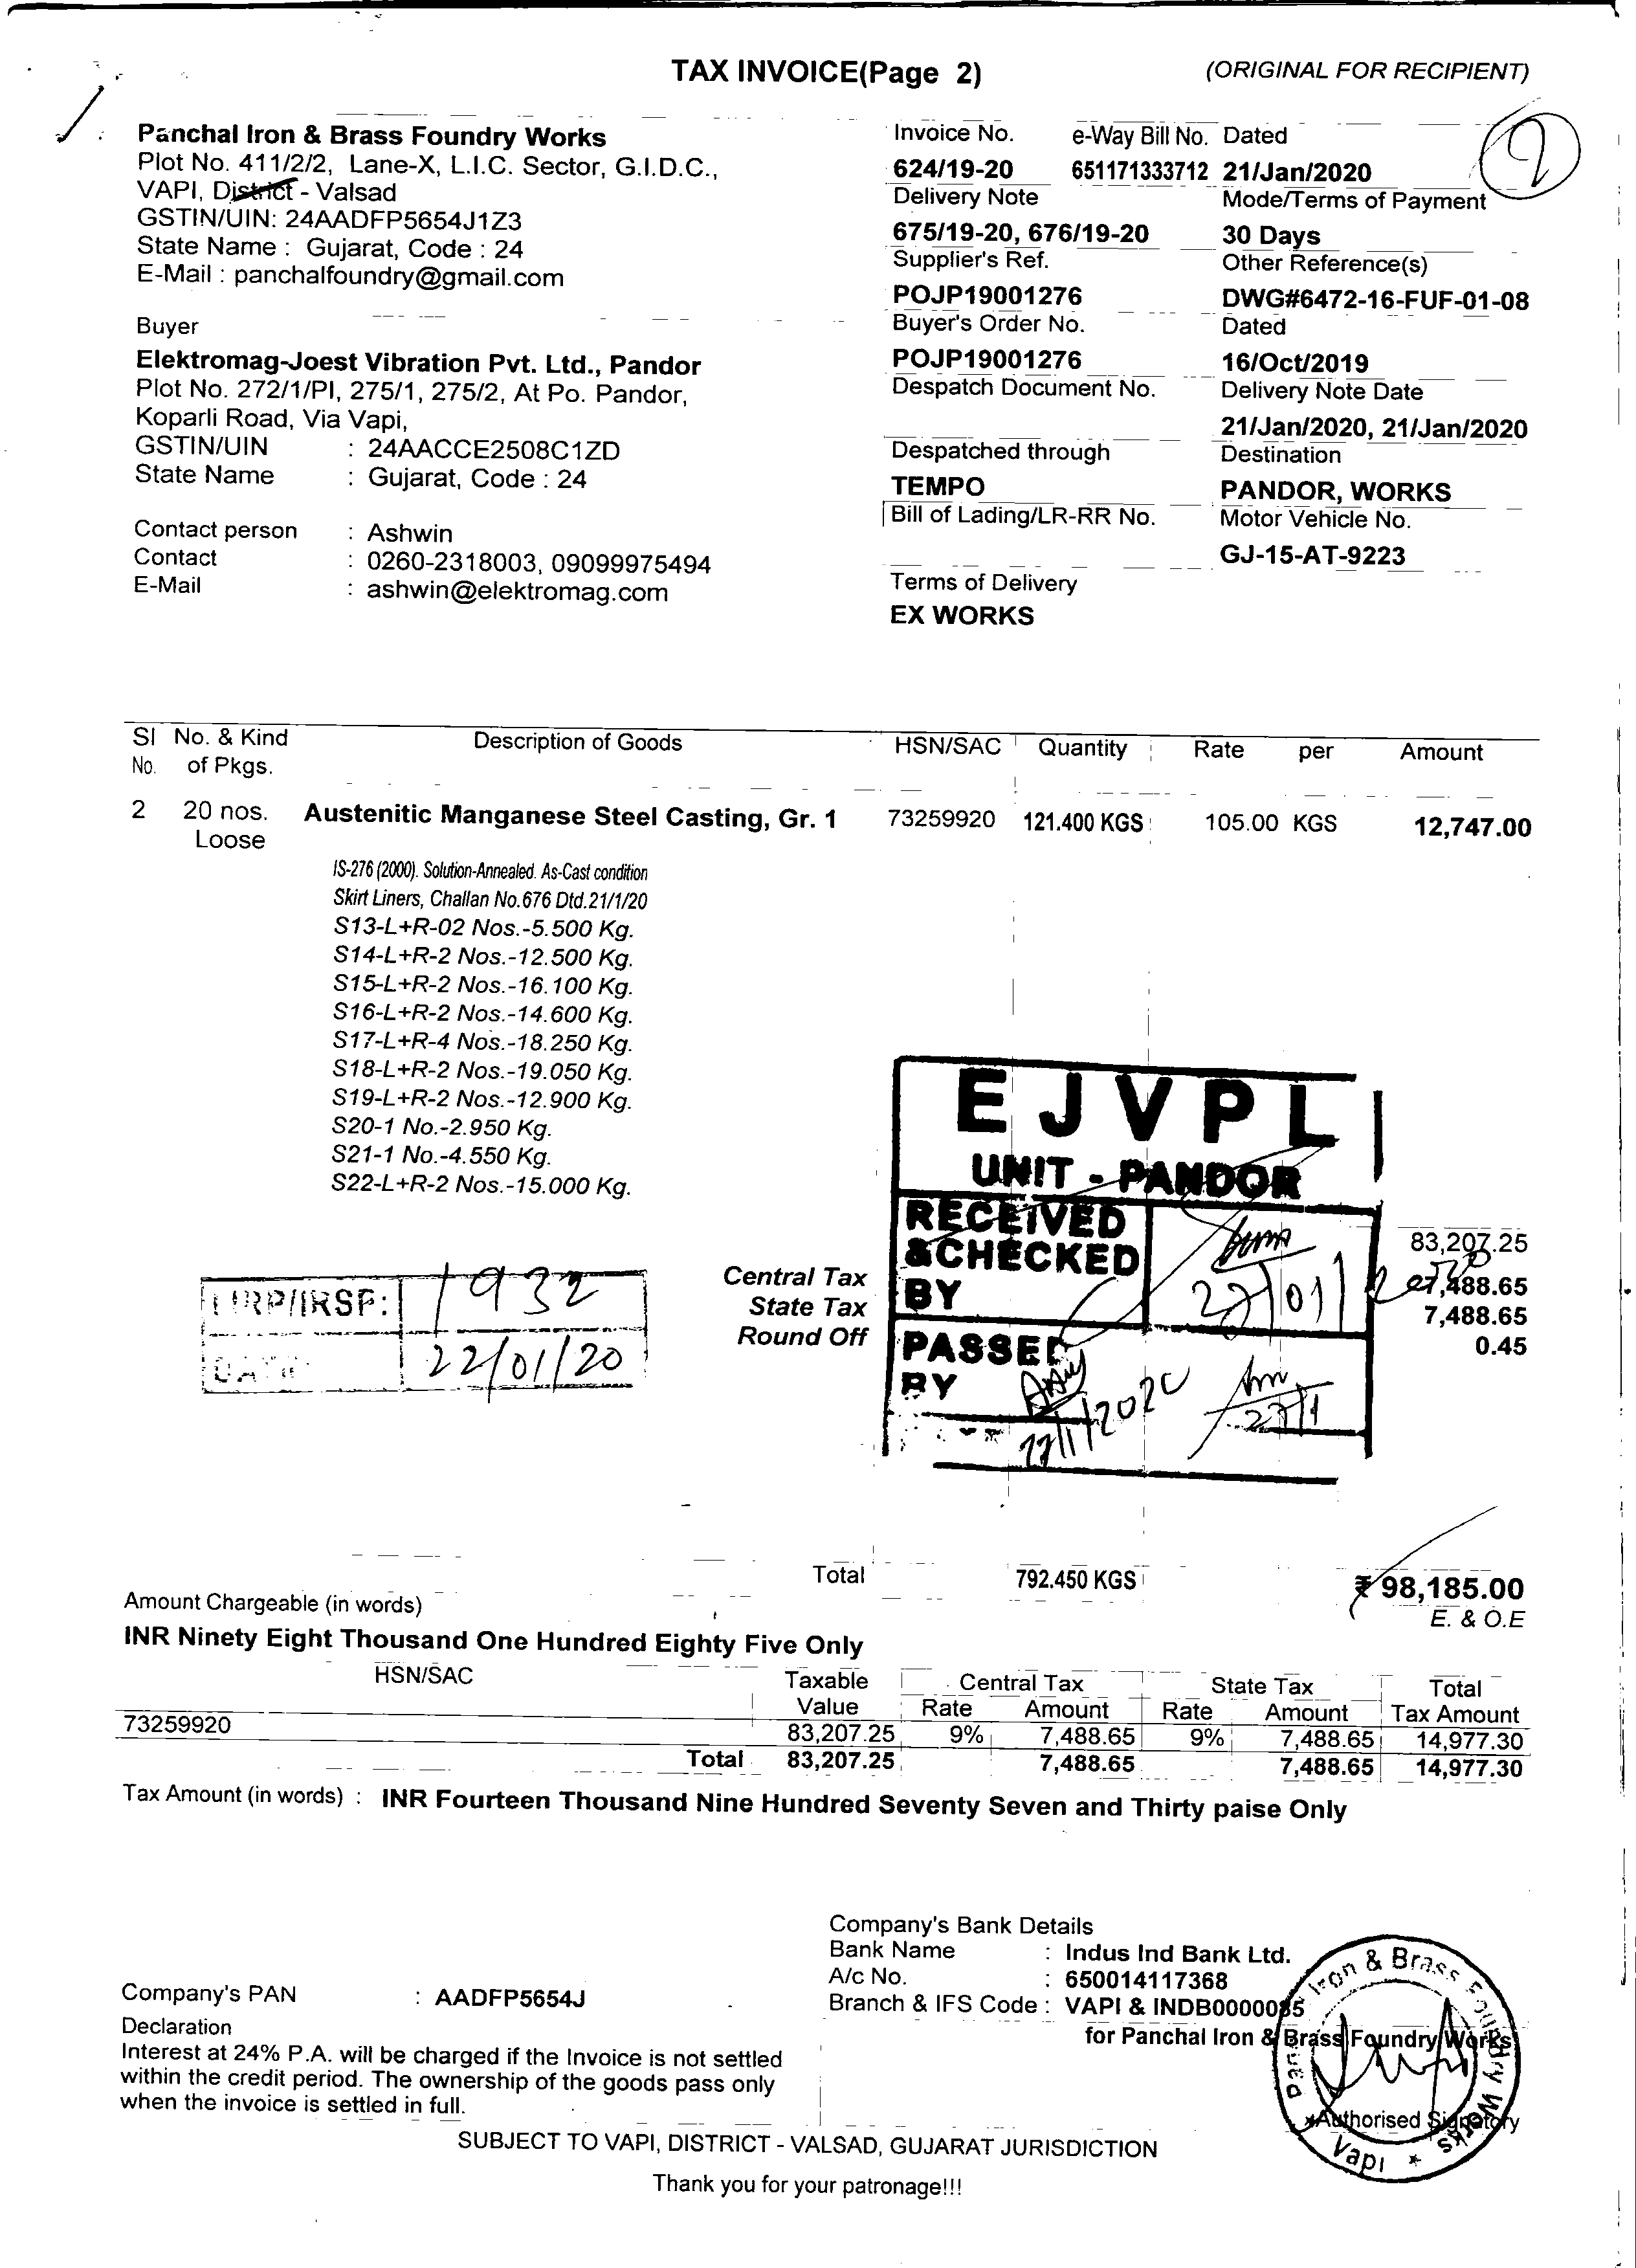

In [17]:
image_1_new = cv2.imread('INVOICE2.jpg')


image_1_new_gray = cv2.cvtColor(image_1_new,cv2.COLOR_BGR2GRAY)

ret_new, mask_new = cv2.threshold(image_1_new_gray, 200, 255, cv2.THRESH_BINARY)

mask_new_pil = Image.fromarray(mask_new)
display(mask_new_pil)

In [18]:
text_5 = pytesseract.image_to_string(mask_new_pil)
print(text_5)

Panchal Iron & Brass Foundry Works

Plot No. 411/2/2, Lane- X, L. | C Sector G. I D. C.

VAPI, Disenf- Valsad

GSTlN/UIN: 24AADFP5654J1Z3
State Name : Gujarat, Code : 24
E-Mail : panchalfoundry@gmail.com

Buyer

Elektromag-Joest Vibration Pvt. Ltd., Pandor
Plot No. 272/1/PI, 275/1, 275/2, At P0. Pandor,

Koparli Road, Via Vapi,
GSTlN/UIN : 24AACCE2508C1ZD
State Name : Gujarat, Code : 24

TAX INVOICE(Page 2)

‘ |nv7C71ice7 Nb
624/1 9-20

é—WaTBiiI NIT Dated '

(ORIGINAL FOR RECIPIENT)

651171333712721lJanl2020

Delivery Note
7675/1 9-20, 676/1 9-20

 

Mode/Terms of Payment 7

730 Days

 

Supplier's Ref.
POJP1 9001 276

i , - - 7Buy7er's Order No.

POJP1 9001 276
Despatch Document No.

Other Reference(s)

DWG#6472-16-FUF-01-08
Dated

77 16IOct/2019

Deliverfﬁoﬁatei
21/Ja7n/2020, 21I7JanI20270

 

‘ Despatched through

TEMPO

[Bill of Lading/LR-RR No.

Destination

PANDOR, WORKS
Motor Vehicle No.

 

Contact person : Ashwin - - - 2
Contact : 0260—2318003, 09099975494 7 7* i.’ i 7 7 ’6‘,

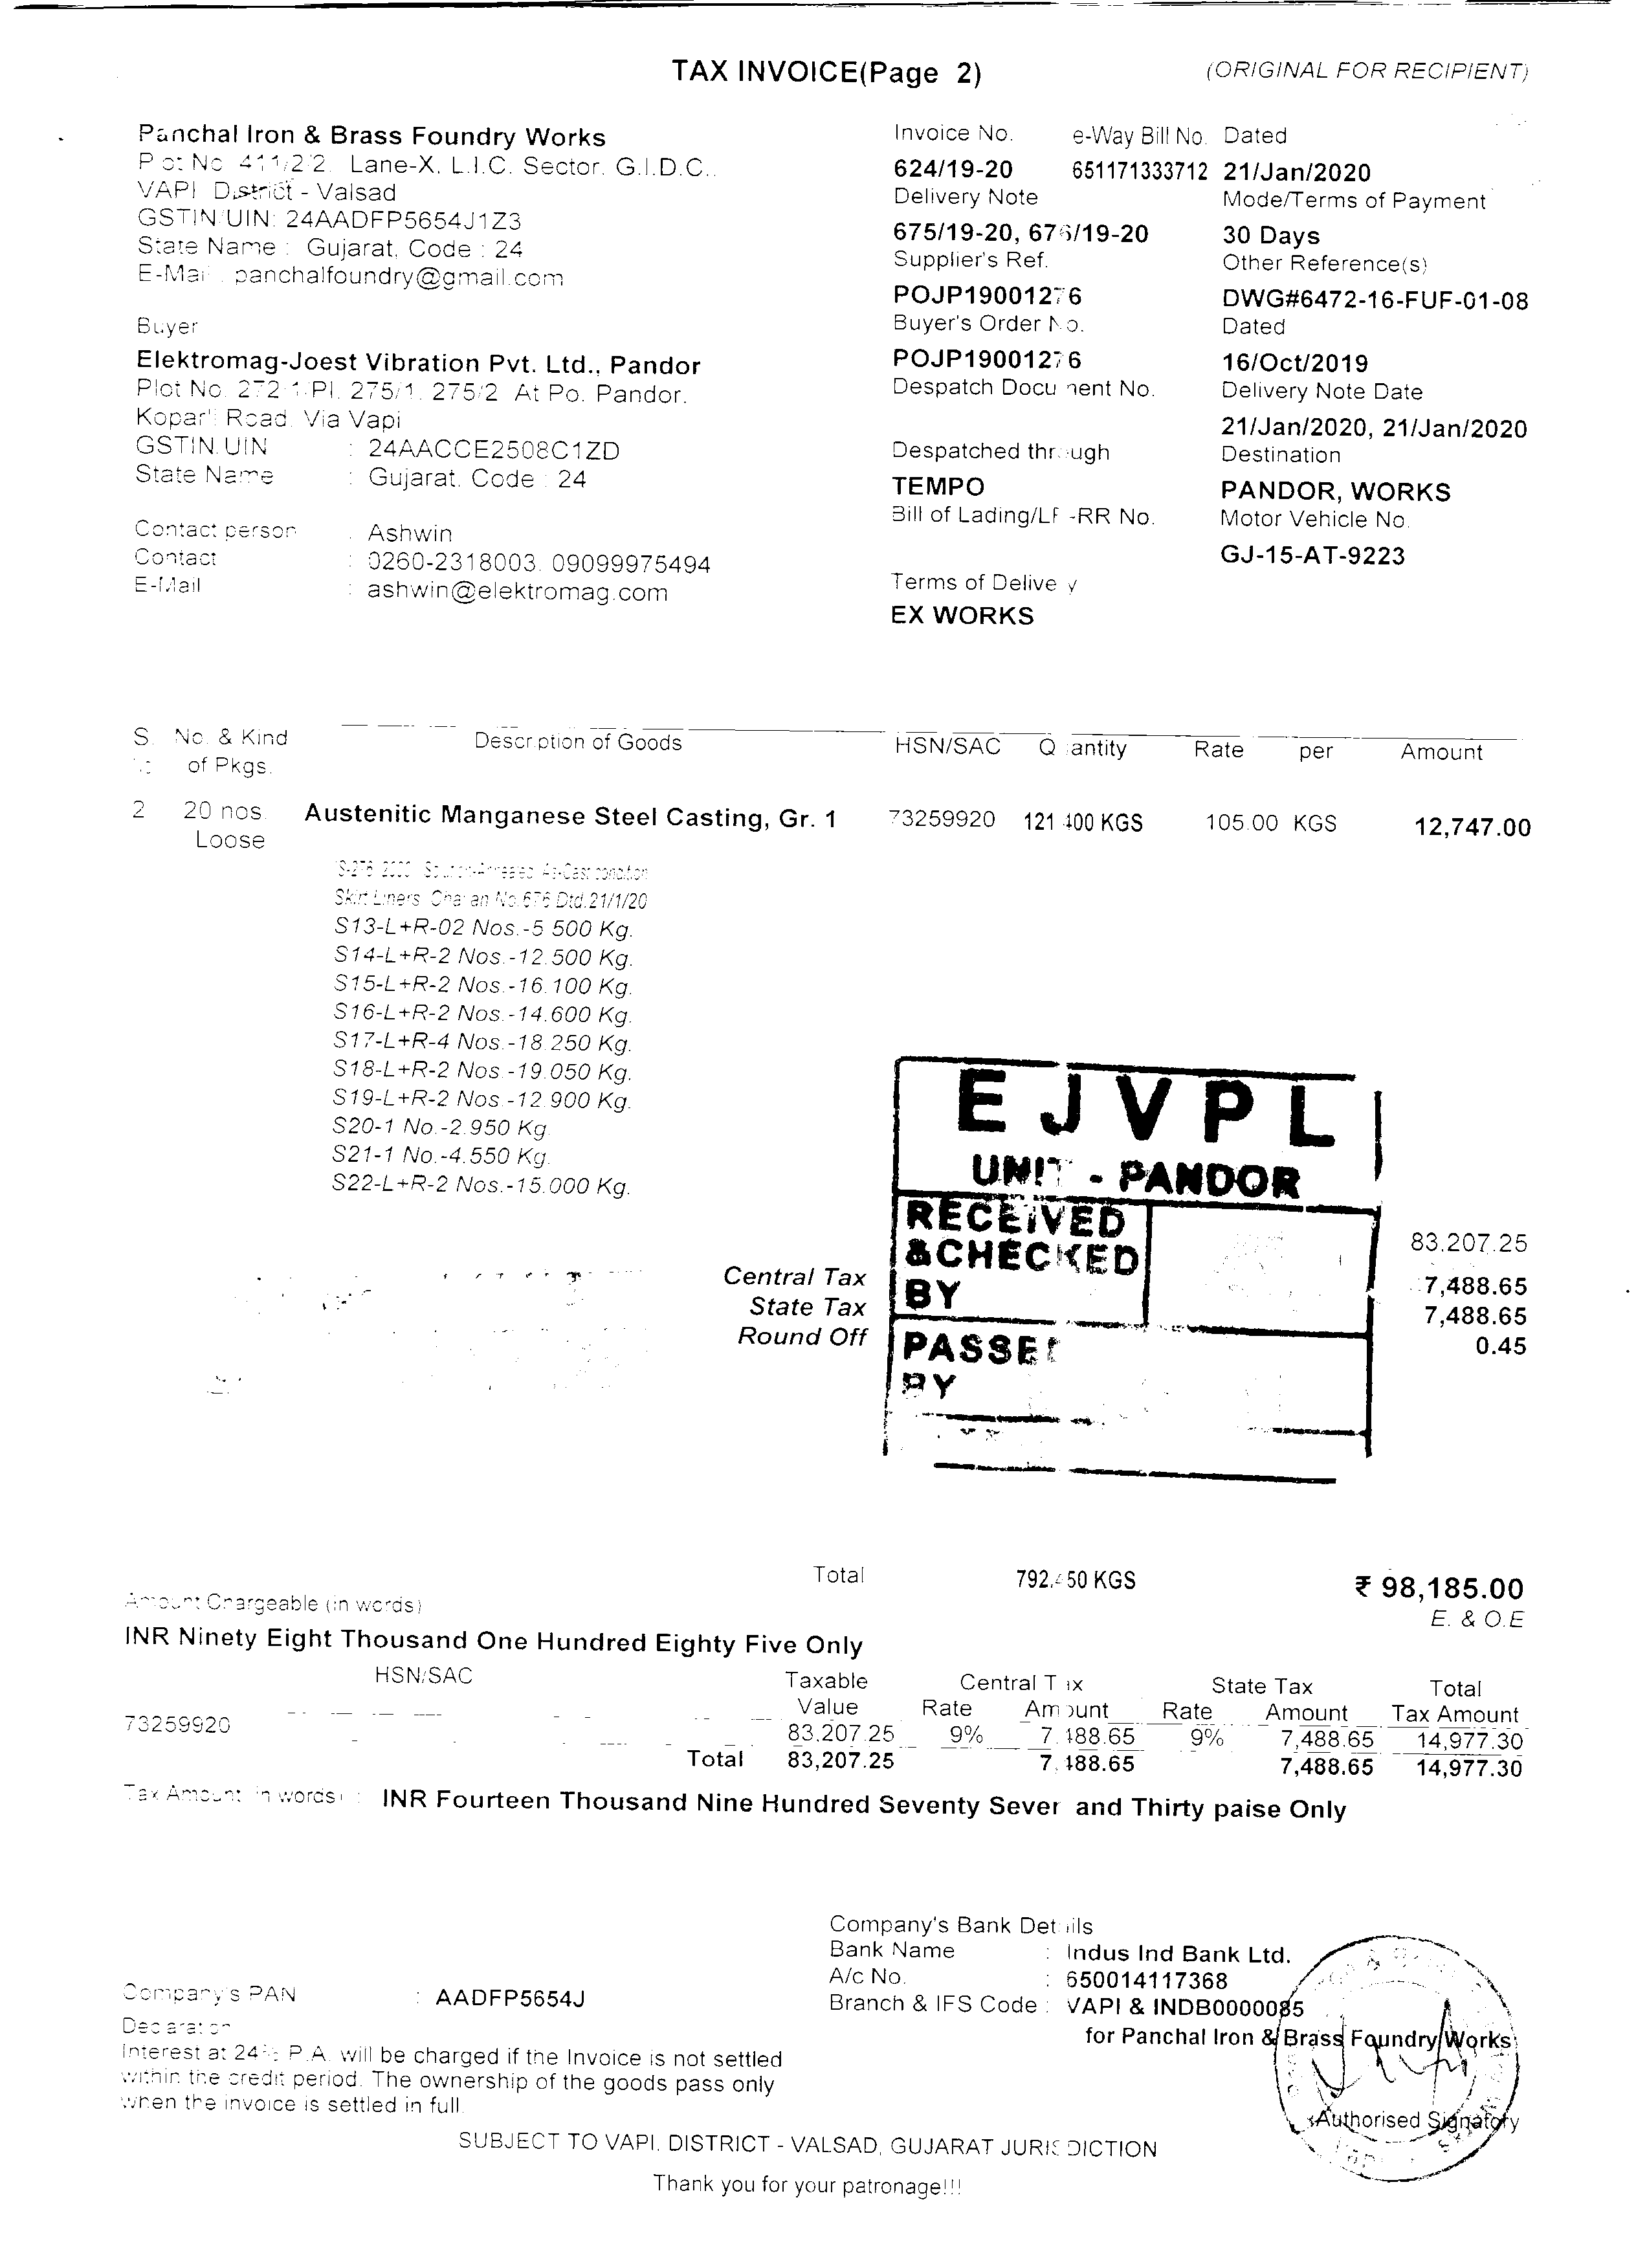

In [9]:
image_2_new = cv2.imread('INVOICE2.jpg')

image_2_new_gray = cv2.cvtColor(image_2_new,cv2.COLOR_BGR2GRAY)

#ret_2, mask_2 = cv2.threshold(image_2_new_gray, 125, 255, cv2.THRESH_BINARY)
#mask_2 = cv2.threshold(image_2_new_gray, 125, 255, cv2.THRESH_BINARY_INV)[1]
mask_2 = cv2.threshold(image_2_new_gray, 125, 255, cv2.THRESH_BINARY)[1]

mask_2_pil = Image.fromarray(mask_2)
display(mask_2_pil)


In [10]:
text_6 = pytesseract.image_to_string(mask_2_pil)
print(text_6)

TAX INVOICE(Page 2) (ORIGINAL FOR RECIPIENT)

 

 

 

 

    

 

 

 

Panchal Iron & Brass Foundry Works ”Nome NO' e—Way BI” NO Dated
P o: N: 41‘ 2 2 Lane— X L I. C. Sector G. I D. C 624/19-20 651171333712 21/Janl2020 7
VAPI Dy'at _ Valsad Delivery Note Mode/Terms of Payment
GSTIN UIN 24AADFP5654J1Z3 675/19-20, 5775/1940 30 Days
§Zate Name Gujarat. Code I 24 Supplier‘s Ref. Other Reference(s,\
:ME‘ ”mohalfomd‘yccggma“ COT POJP1900127'6 DWG#6472-16-FUF-01-08
BL ym Buyer's Order I\ o. Dated
EIektromag-Joest Vibration Pvt. Ltd.. Pandor POJP1:0§1276 t N éBfOct/ZNOIQD t
Plot No 2‘2 < Pl 275,1 2752 At Do. Pandor. 9959“ 0C“ ”e” 0' 9 New 0 e a e
Kopar‘ R333 Via Vapi 21/Jan/2020, 21/Jan/2020
GSTI N UIN - 24AACCE2508C1ZD Despatched thr-ugh Destination
State Nan“: ' Gujarat. Code 24 TEMPO PANDOR, WORKS
Bill of Lading/LI -RR No. Motor Vehicle No
Contac eersO” Ashwin
GJ-15-AT-9223
Con-ta: 0260-2318003 09099975494 T .
_ . . erms of Delive y
: nlail ashwrn@elektromag,com
EX WORKS
8 \IC & Kind iiﬁ 

Erosions and dilations ::
Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding).

To reduce the size of foreground objects we can erode away pixels given a number of iterations:

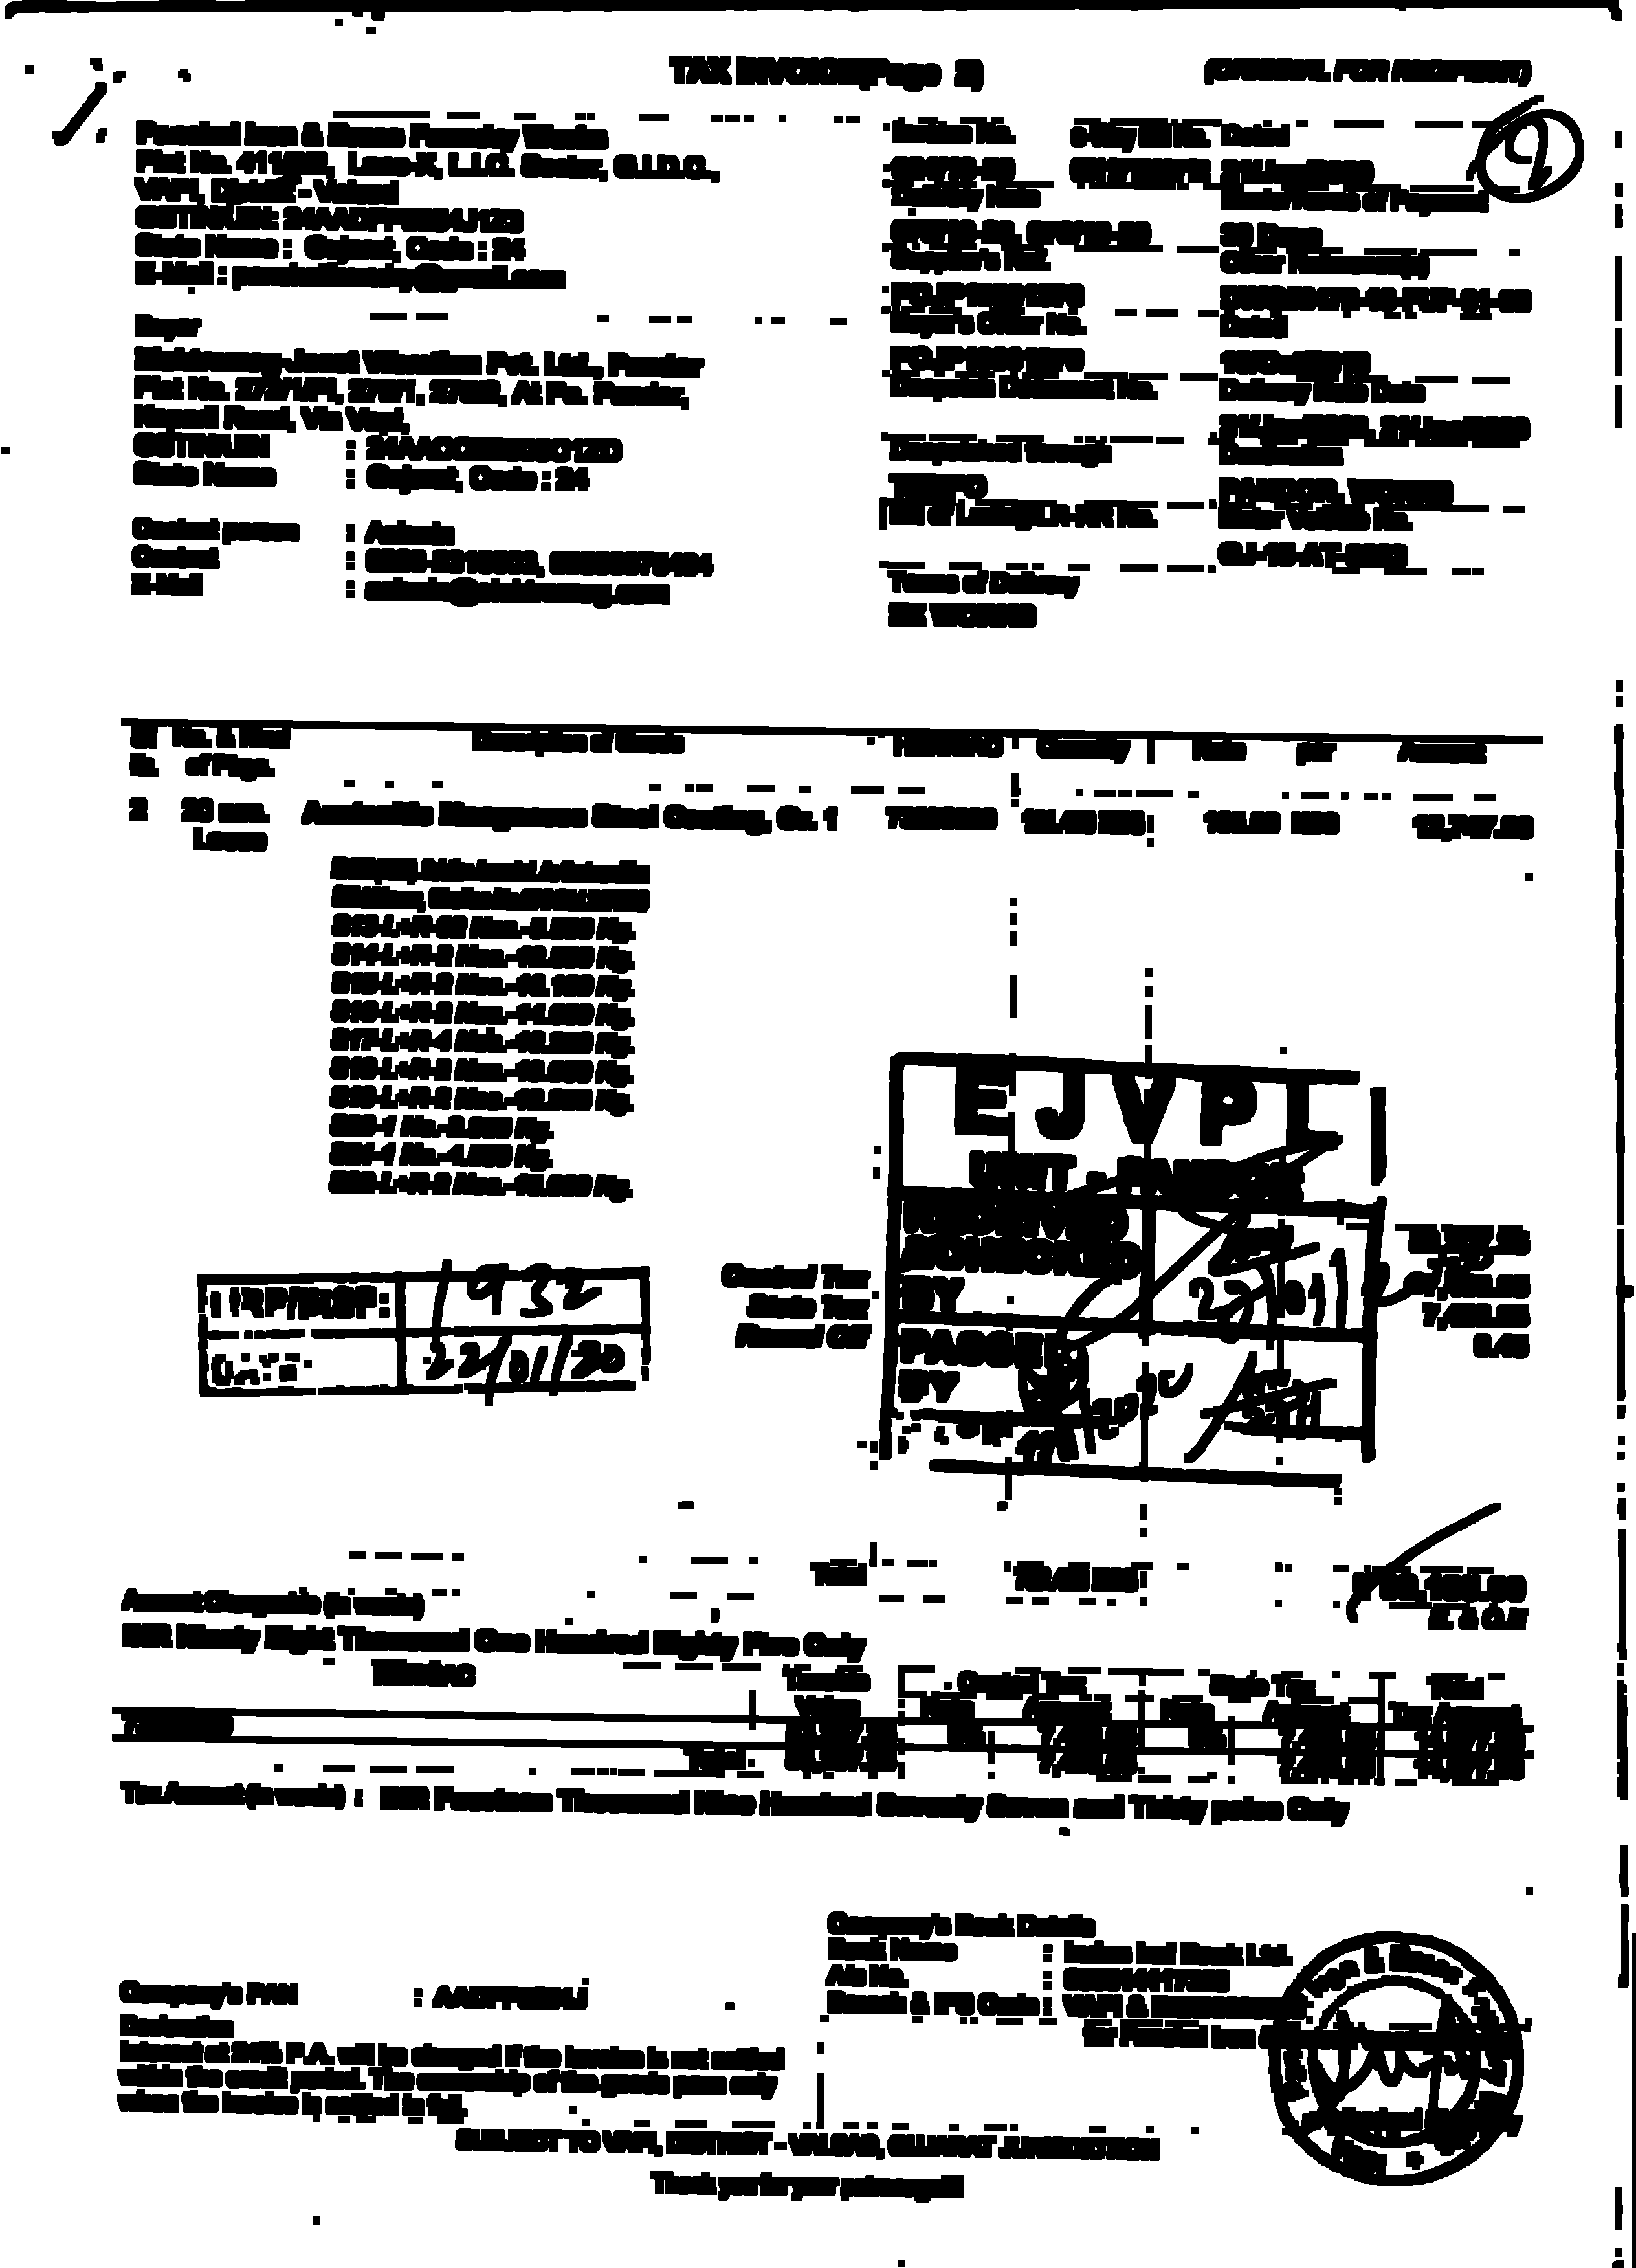

In [19]:
# we apply erosions to reduce the size of foreground objects
mask_new_2 = mask_new.copy()
mask_new_2 = cv2.erode(mask_new_2, None, iterations=5)
mask_new_2_pil = Image.fromarray(mask_new_2)
display(mask_new_2_pil)

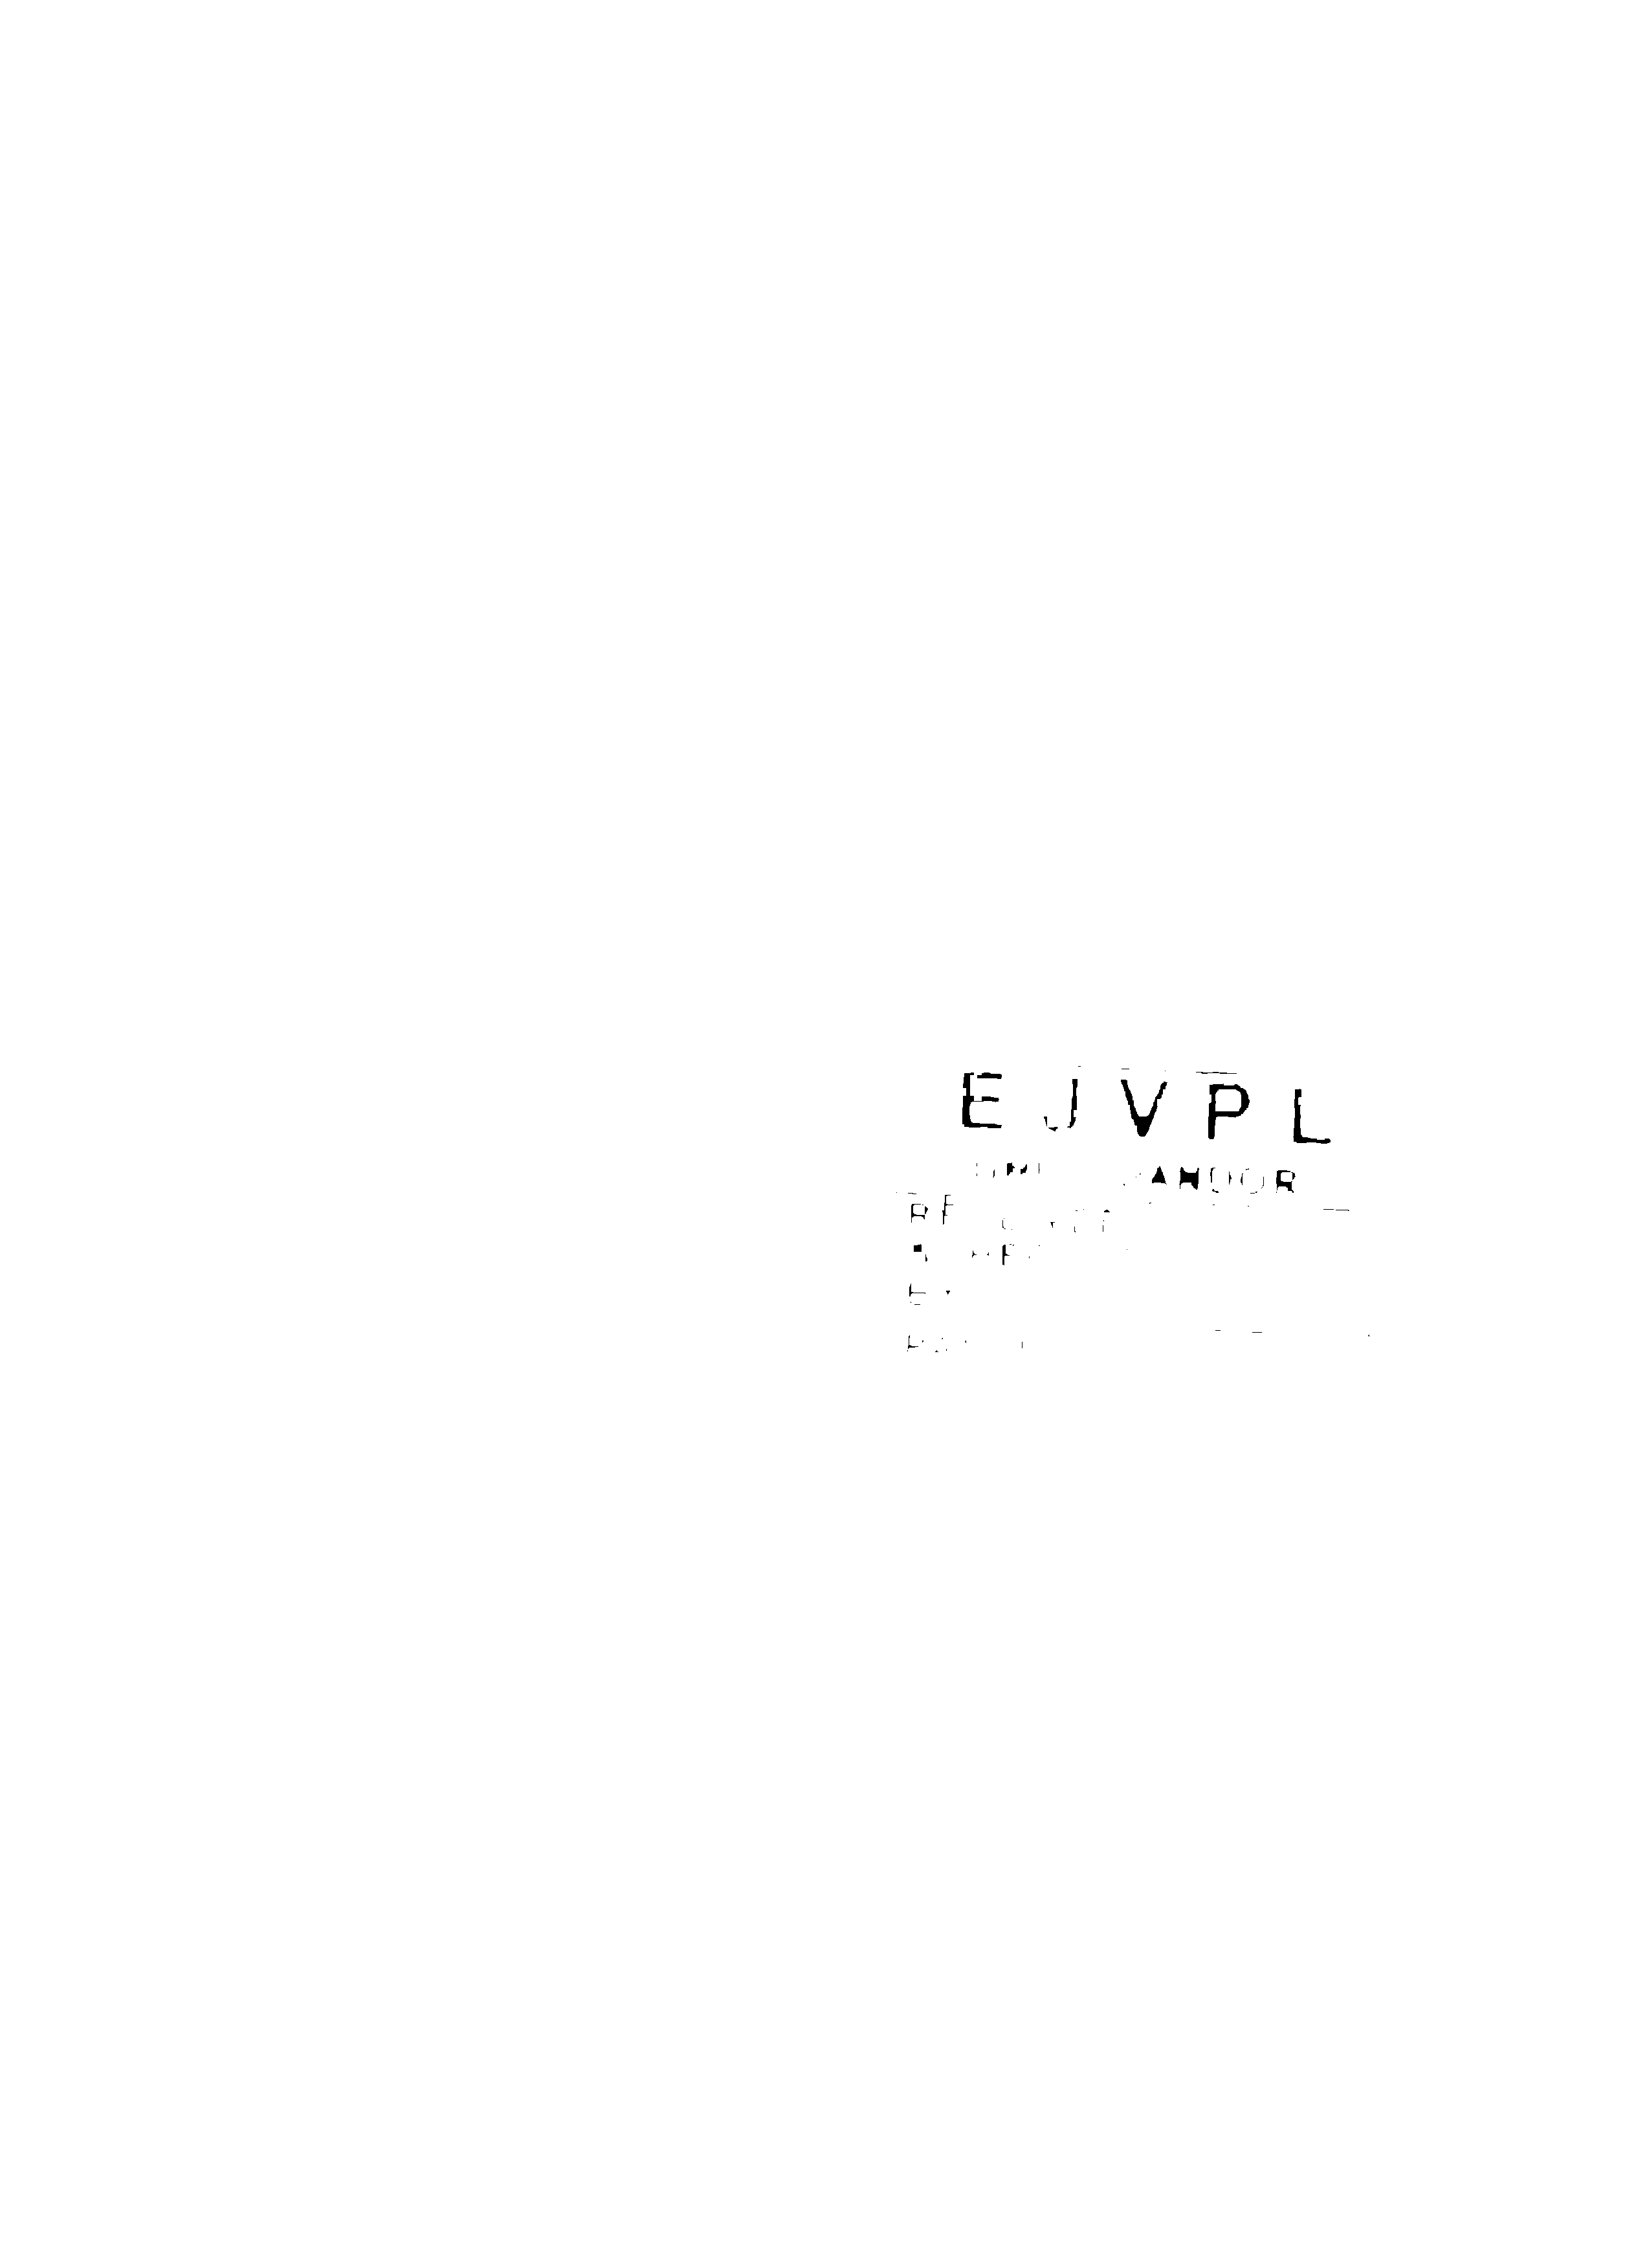

In [8]:
# similarly, dilations can increase the size of the ground objects
mask_new_3 = mask_new.copy()
mask_new_3 = cv2.dilate(mask_new_3, None, iterations=5)

mask_new_3_pil = Image.fromarray(mask_new_3)
display(mask_new_3_pil)